In [1]:
%matplotlib inline


# PCA example with Iris Data-set


Principal Component Analysis applied to the Iris dataset. Selecting 3 principal components (eigenvectors) to keep.

See `here <https://en.wikipedia.org/wiki/Iris_flower_data_set>`_ for more information on this dataset.



Automatically created module for IPython interactive environment

Explained variance ratio: [ 0.92461621  0.05301557  0.01718514]

In other words... we can see that:
Varience explained by the first component: 92.46%
Varience explained by the second component: 5.30%
Varience explained by the third component:  1.72%


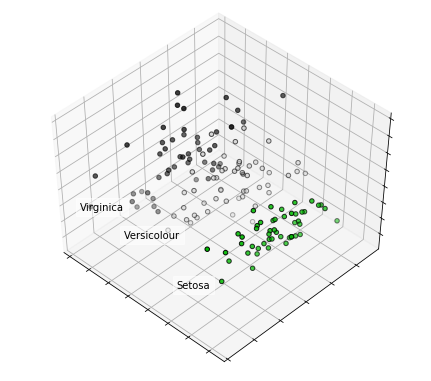

In [2]:
print(__doc__)
# Adapted from code originally written by: Gaël Varoquaux  (Thank you!)
# License: BSD 3 clause
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition  # Another way to do this, will call PCA in slightly different way (See below)
from sklearn import datasets

np.random.seed(5)
centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(6, 5))
plt.clf() # clear figure
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla() # clear axis
pca = decomposition.PCA(n_components=3) # slighty different call but still doing PCA
pca.fit(X) # Fit the data

# Percentage of variance explained for each components (three this time)
# This show how much varience is captured by the eigenvectors
print("")
print('Explained variance ratio: %s' % str(pca.explained_variance_ratio_))
print("")
print("In other words... we can see that:")
print('Varience explained by the first component: {:2.2f}%'.format(pca.explained_variance_ratio_[0]*100))
print('Varience explained by the second component: {:2.2f}%'.format(pca.explained_variance_ratio_[1]*100))
print('Varience explained by the third component:  {:2.2f}%'.format(pca.explained_variance_ratio_[2]*100))

X = pca.transform(X) # Transform the data according to the three components

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()